In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./data/Book.xlsx')
import theano
theano.__version__

'1.0.4'

In [3]:
# adding a column of minutes in the data
mins = []
for r in range(len(data)):
    mins.append(data.iloc[r]['time']//60) 
    
data['minute'] = mins

Text(63.125, 0.5, 'Time(in mins)')

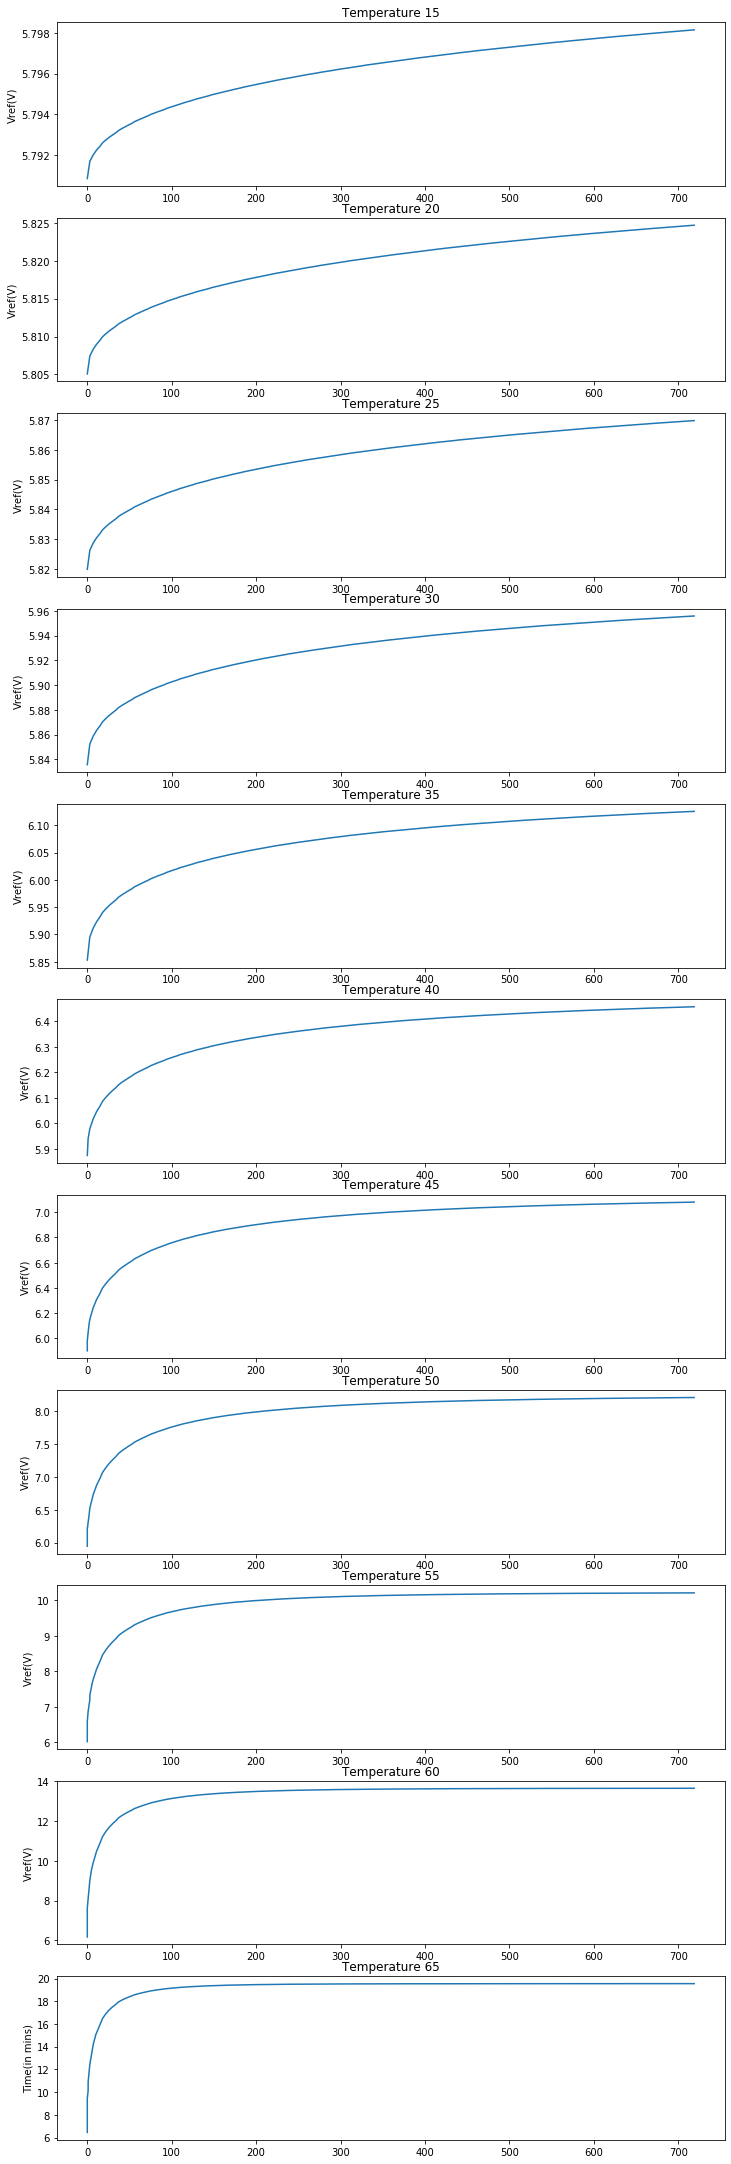

In [4]:
# plotting vref vs time plot for temperature in range 15 to 65 with a gap of 5 deg C
fig, axs = plt.subplots(11, 1, figsize=(10,30))
fig.tight_layout()
count = 0
for T in range(15,66,5):
    time = data[data['Temperature'] == T]['minute']
    vref = data[data['Temperature'] == T]['V(vref)']
    axs[count].plot(time, vref)
    #axs[count].set_xlabel('Time(in mins)')
    axs[count].set_ylabel('Vref(V)')
    axs[count].set_title('Temperature %s' %T)
    count += 1

axs[10].set_ylabel('Time(in mins)')

In [6]:
'''
Initializing model
Vref = epsilon - alpha * exp(-beta*time)
'''

def inferring_parameters(time, vref):
    model_isfet = pm.Model()
    
    with model_isfet:
        alpha = pm.Uniform('alpha',0,15)
        beta = pm.Uniform('beta',0,15)
        epsilon = pm.Uniform('epsilon', 0,20)
        sd_vref = pm.Uniform('vref_sd', 0,1)
        voltage = pm.Normal('Voltage',mu = epsilon - alpha*np.exp(-beta*time), sigma=sd_vref,observed=vref)
        step = pm.Metropolis()
        trace = pm.sample(200000, step=step)
    
    return trace
    
#import pickle as pk
#Traces = pm.database.pickle.load('../Traces')

In [8]:
Traces = {}
for T in range(15,66,5):
    print("Working on Temperaure: ", T)
    time = data[data['Temperature'] == T]['minute']
    vref = data[data['Temperature'] == T]['V(vref)']
    trace = inferring_parameters(time, vref)
    Traces[T] = trace

Working on Temperaure:  15


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [05:06<00:00, 2615.05draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure:  20


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:39<00:00, 2867.08draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure:  25


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:42<00:00, 2839.58draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure:  30


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:37<00:00, 2885.82draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure:  35


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:41<00:00, 2844.90draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


Working on Temperaure:  40


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:39<00:00, 2874.19draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure:  45


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:38<00:00, 2876.30draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure:  50


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:42<00:00, 2837.93draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure:  55


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:41<00:00, 2844.96draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure:  60


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:39<00:00, 2868.64draws/s]
The number of effective samples is smaller than 10% for some parameters.


Working on Temperaure:  65


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████████████████████████████████████████████| 802000/802000 [04:40<00:00, 2862.35draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [9]:
for k in Traces.keys():
    df = pm.backends.tracetab.trace_to_dataframe(Traces[k])
    df.to_csv(str(k)+'_trace.csv')

In [ ]:
print(trace["epsilon"][::3][1000:,None])
epsilon_samples = trace["epsilon"][::3][1000:,None]
alpha_samples = trace["alpha"][::3][1000:,None]  # best to make them 1d
beta_samples = trace["beta"][::3][1000:,None]

fig = plt.figure(figsize=(10, 10))
#histogram of the samples:
plt.subplot(411)
plt.title(r"Posterior distributions of the variables $\alpha$, $\beta$, and $\epsilon$")
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#A60628", normed=True)
plt.legend();

plt.subplot(412)
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#7A68A6", normed=True)
plt.legend()

plt.subplot(413)
plt.hist(epsilon_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\epsilon$", color="#A60628", normed=True)
plt.legend();

'''
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);
'''

In [ ]:
epsilon_mean = epsilon_samples.mean()
alpha_mean = alpha_samples.mean()
beta_mean = beta_samples.mean()
print(epsilon_mean, alpha_mean, beta_mean)

In [ ]:
fig = plt.figure(figsize=(7, 7))
y_pred = epsilon_mean - alpha_mean*np.exp(-beta_mean*x)
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y_pred, 'r', label='sampled data')
ax.plot(x, y, 'g')